# Telco Customer Churn Prediction

Predict churn for IBM telco churn dataset. <br> Please note that I am only using 5 features in this analysis. 

## Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

pd.set_option('display.max_columns', 999)

## Load Dataset

In [2]:
dataset = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# For this demonstration, I only use 5 features
dataset = dataset[['customerID','PaperlessBilling','tenure','InternetService','MonthlyCharges','Contract','Churn']]
dataset.head()

,customerID,PaperlessBilling,tenure,InternetService,MonthlyCharges,Contract,Churn
0,7590-VHVEG,Yes,1,DSL,29.85,Month-to-month,No
1,5575-GNVDE,No,34,DSL,56.95,One year,No
2,3668-QPYBK,Yes,2,DSL,53.85,Month-to-month,Yes
3,7795-CFOCW,No,45,DSL,42.30,One year,No
4,9237-HQITU,Yes,2,Fiber optic,70.70,Month-to-month,Yes


## Check Data Description 

Preview the dataset information.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   tenure            7043 non-null   int64  
 3   InternetService   7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   Contract          7043 non-null   object 
 6   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 385.3+ KB


## Handling Null Value

I do not see null values. However, if you want to preprocess null values, below are some codes.

In [4]:
dataset['InternetService'] = dataset['InternetService'].fillna(dataset['InternetService'].mode()[0]) # Imputate with mode (most frequent class)
dataset['PaperlessBilling'] = dataset['PaperlessBilling'].fillna('Unknown') # Create new category
dataset['tenure'] = dataset['tenure'].fillna(dataset['tenure'].mean()) # Fill with mean

## Exploratory Data Analysis

In this part we will dive deeper into our dataset. <br> We will do some analysis such as:<br>

**Univariate**
- Distributrion
- Distribution with regards to the label 

**Bivariate** 
- Correlation 

### Univariate Analysis

**Paperless Billing** <br>

We observe a higher number in the paperless billing category. <br>
The churn rate is higher among customers with Paperless Billing. 

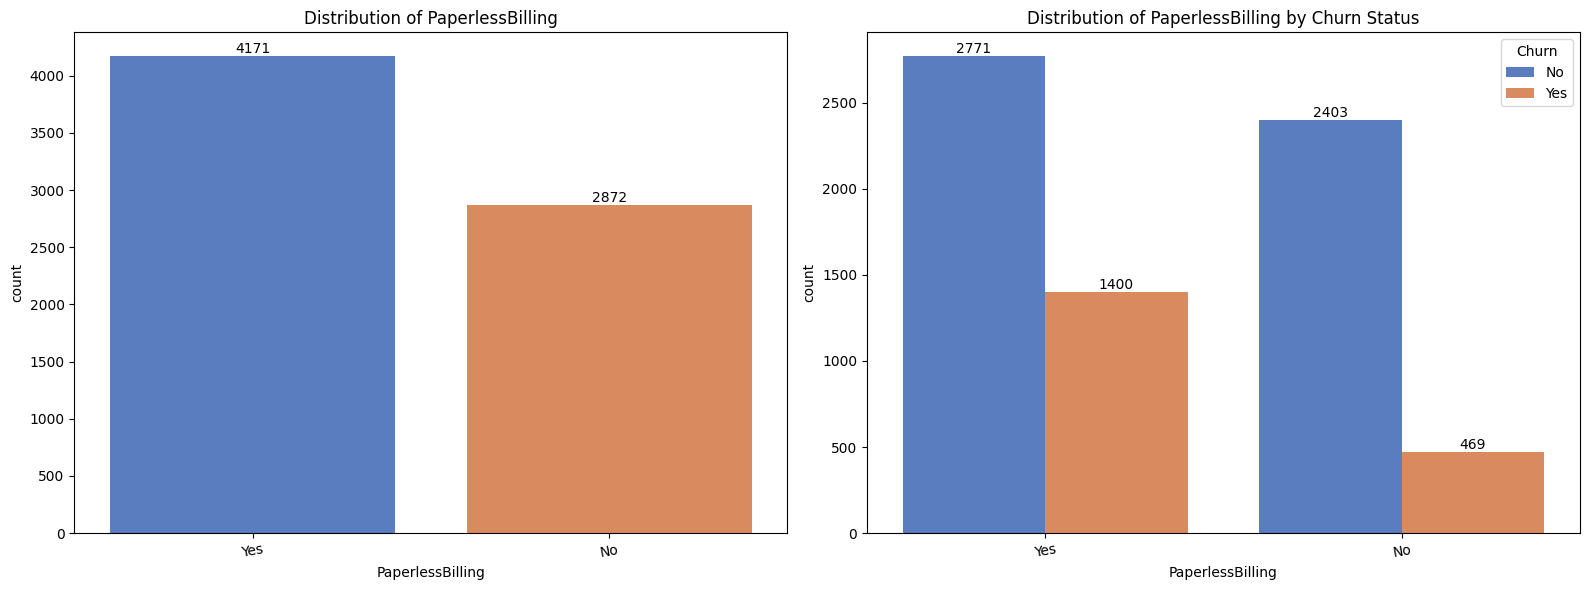

In [5]:
fig,ax = plt.subplots(1,2, figsize = (16,6))
sns.countplot(data = dataset, x="PaperlessBilling", ax=ax[0], palette = 'muted')
sns.countplot(data = dataset, x="PaperlessBilling", hue="Churn", ax=ax[1], palette = 'muted')
ax[0].set_title("Distribution of PaperlessBilling")
ax[1].set_title("Distribution of PaperlessBilling by Churn Status")

ax[0].tick_params(axis='x', rotation=10)
ax[1].tick_params(axis='x',rotation = 10)

for container in ax[0].containers:
    ax[0].bar_label(container)
    
for container in ax[1].containers:
    ax[1].bar_label(container)
    
fig.tight_layout()
plt.show()

**Internet Service** <br>

We observe a higher number of customers in the fiber optic category. <br>
Additionally, the churn rate is higher among customers using fiber optic services

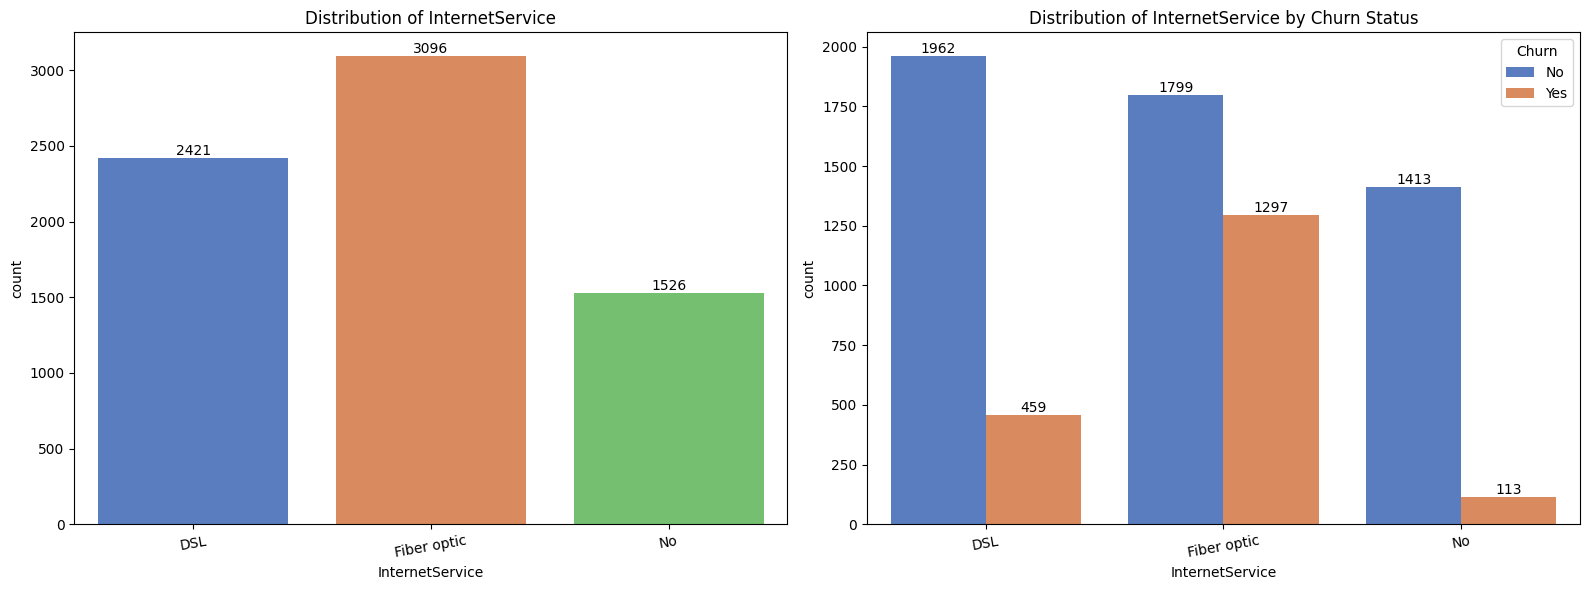

In [6]:
fig,ax = plt.subplots(1,2, figsize = (16,6))
sns.countplot(data = dataset, x="InternetService", ax=ax[0], palette = 'muted')
sns.countplot(data = dataset, x="InternetService", hue="Churn", ax=ax[1], palette = 'muted')
ax[0].set_title("Distribution of InternetService")
ax[1].set_title("Distribution of InternetService by Churn Status")

ax[0].tick_params(axis='x', rotation=10)
ax[1].tick_params(axis='x',rotation = 10)

for container in ax[0].containers:
    ax[0].bar_label(container)
    
for container in ax[1].containers:
    ax[1].bar_label(container)
    
fig.tight_layout()
plt.show()

**Contract** <br>

We observe a higher number of customers in the Month-to-Month category. <br>
Additionally, the churn rate is higher among customers with Month-to-Month contract.

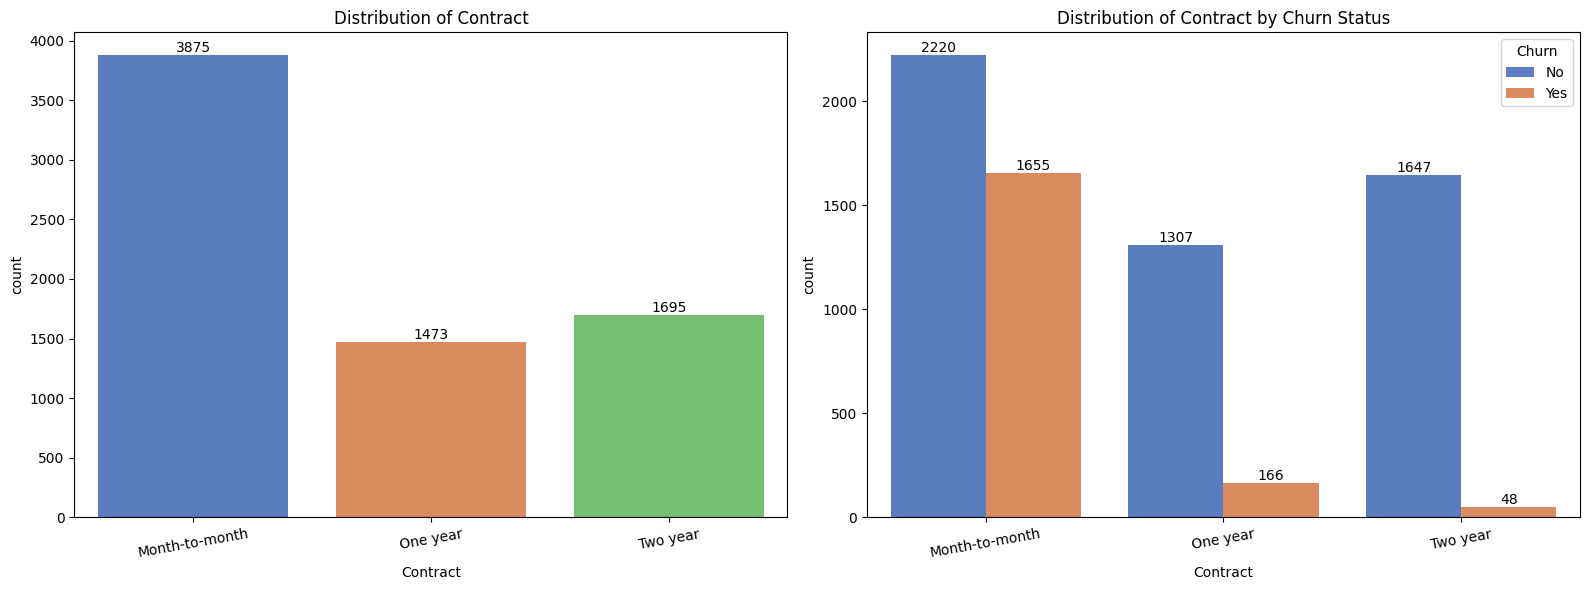

In [7]:
fig,ax = plt.subplots(1,2, figsize = (16,6))
sns.countplot(data = dataset, x="Contract", ax=ax[0], palette = 'muted')
sns.countplot(data = dataset, x="Contract", hue="Churn", ax=ax[1], palette = 'muted')
ax[0].set_title("Distribution of Contract")
ax[1].set_title("Distribution of Contract by Churn Status")

ax[0].tick_params(axis='x', rotation=10)
ax[1].tick_params(axis='x',rotation = 10)

for container in ax[0].containers:
    ax[0].bar_label(container)
    
for container in ax[1].containers:
    ax[1].bar_label(container)
    
fig.tight_layout()
plt.show()

**Tenure**

- The tenure distribution shows as significant number of customers with very short tenure (close to 0). 
- Another peak at the higher end (close to 70). 
- This suggests that there are many new customers and a substantial of long-term cusromers. 
- Customers who churn tend to have shorter tenure. The majority of churners have a tenure of less than 10 months.
- There are fewer churners with longer tenure, indicating that longer-tenured customers are less likely to churn.
- The mean tenure for customers who did not churn is higher than for those who churned. Non-churners have a mean tenure of around 30-40 months, while churners have a median tenure of less than 20 months.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

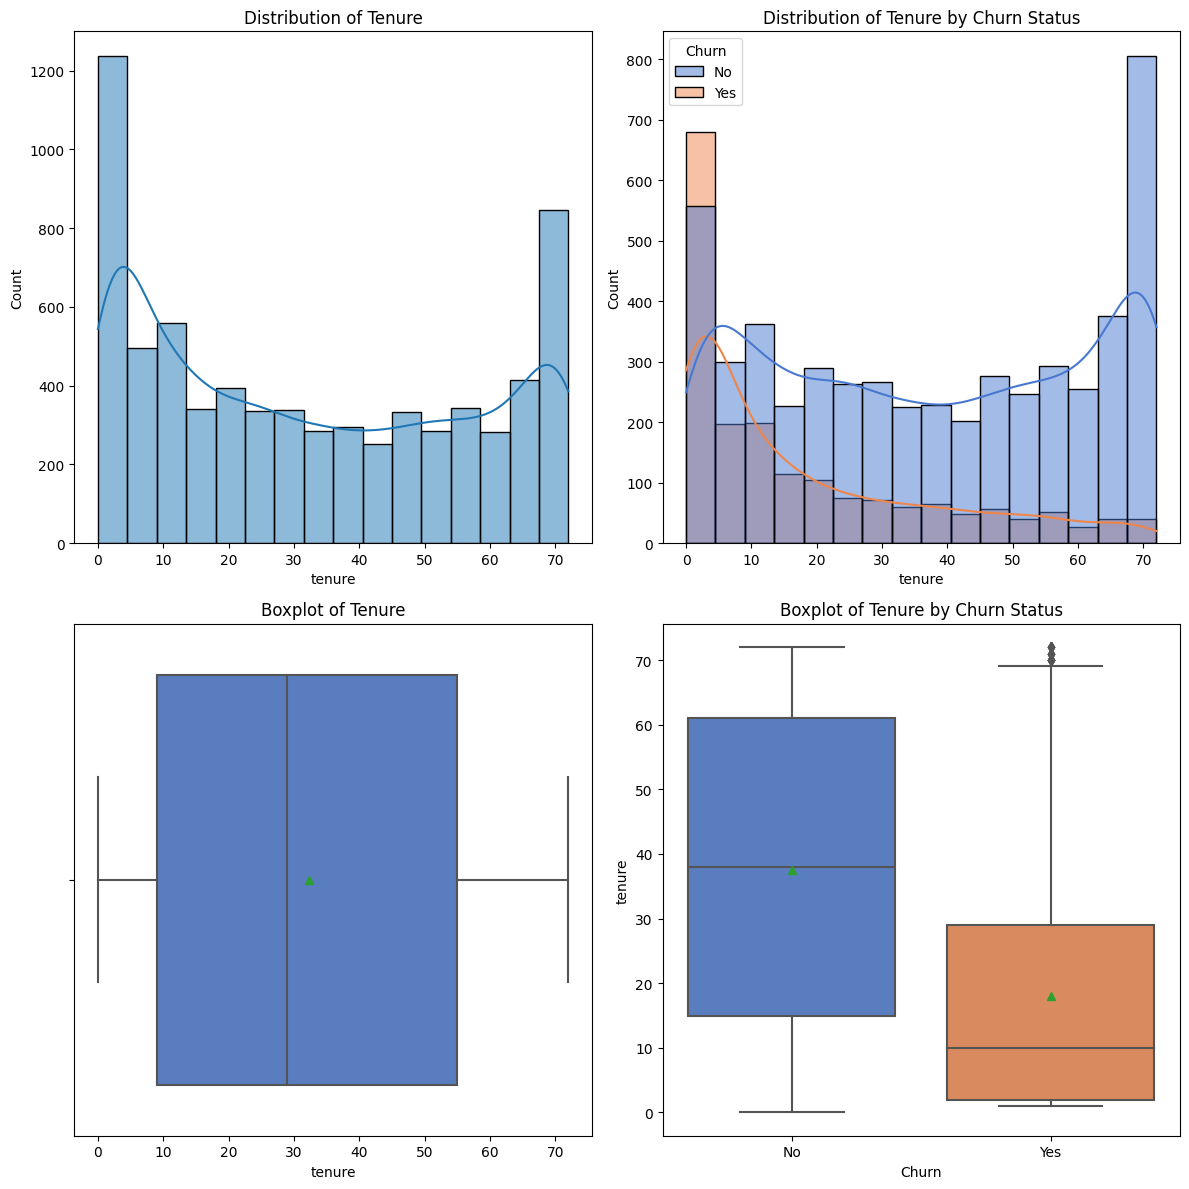

In [8]:
fig,ax = plt.subplots(2,2, figsize = (12,12))
sns.histplot(data = dataset, x="tenure", kde=True, ax=ax[0,0])
sns.histplot(data = dataset, x="tenure", hue="Churn", kde=True, ax=ax[0,1], palette="muted")
sns.boxplot(data = dataset, x="tenure", ax=ax[1,0], palette="muted", showmeans = True)
sns.boxplot(data = dataset, x="Churn", y="tenure", ax=ax[1,1], palette="muted", showmeans = True)

ax[0,0].set_title("Distribution of Tenure")
ax[0,1].set_title("Distribution of Tenure by Churn Status")
ax[1,0].set_title("Boxplot of Tenure")
ax[1,1].set_title("Boxplot of Tenure by Churn Status")

fig.tight_layout()
plt.show()

**Monthly Charges**

- The distribution of Monthly Charges shows a peak at the lower end (around 20) and another peak between 70-100. 
- This suggests that there are two primary groups of customers: those with low monthly charges and those with moderate to high monthly charges.
- Customers with High Monthly Charges have a higher churn rate. 
- There is a wide range of monthly charges, indicating diverse pricing plans and customer usage.
- The mean monthly charge for customers who churned is higher than for those who did not churn. Churners have a mean monthly charge of around 80, while non-churners have a median charge of around 60-70.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

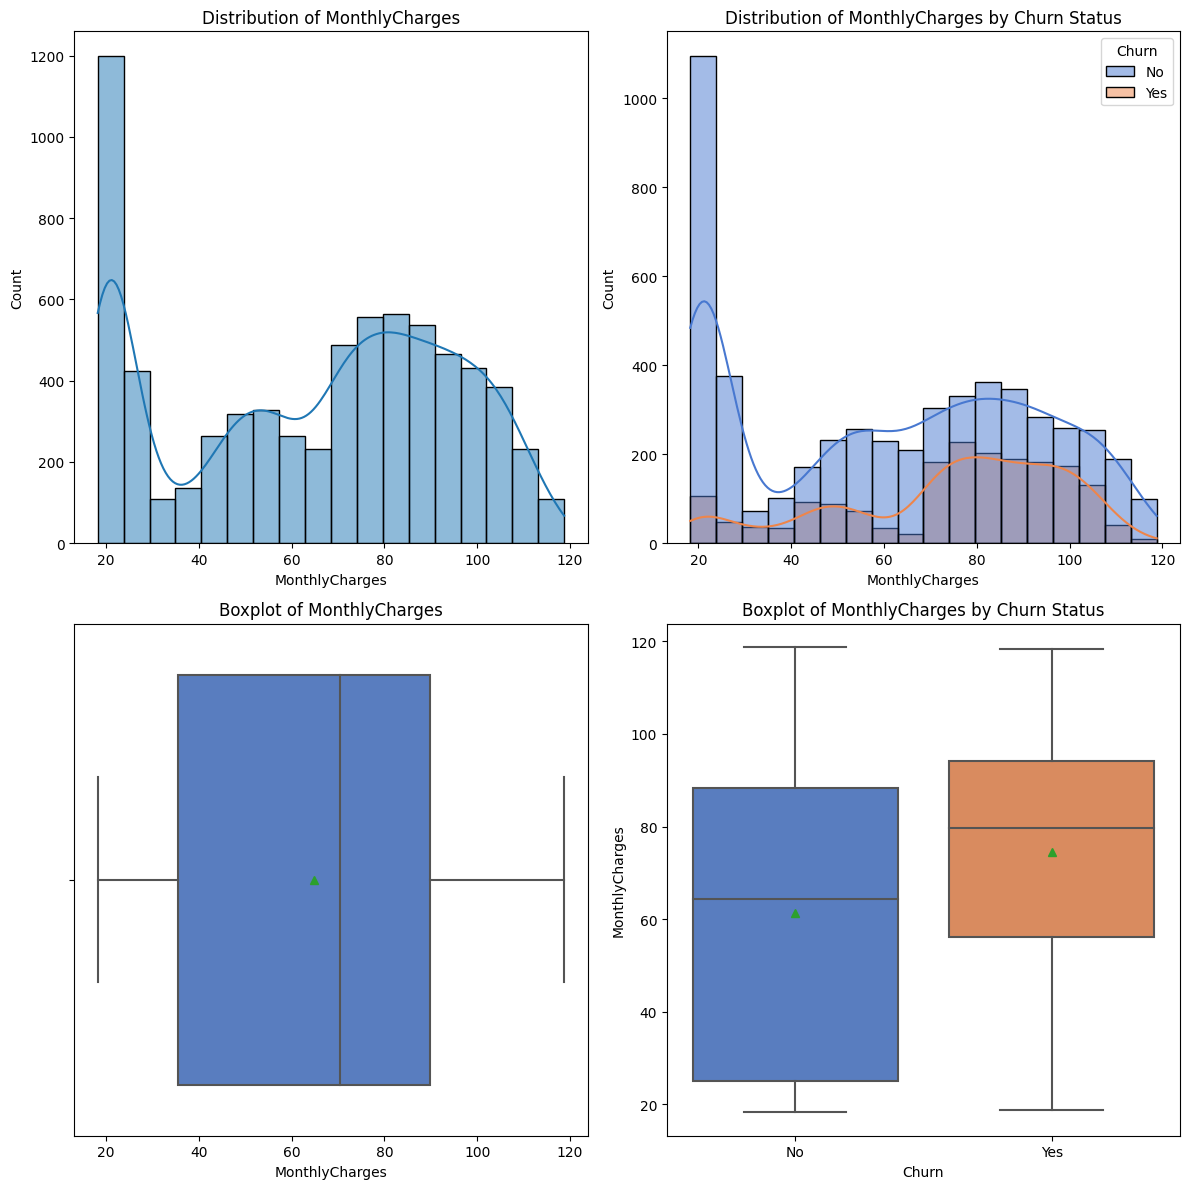

In [9]:
fig,ax = plt.subplots(2,2, figsize = (12,12))
sns.histplot(data = dataset, x="MonthlyCharges", kde=True, ax=ax[0,0])
sns.histplot(data = dataset, x="MonthlyCharges", hue="Churn", kde=True, ax=ax[0,1], palette="muted")
sns.boxplot(data = dataset, x="MonthlyCharges", ax=ax[1,0], palette="muted", showmeans = True)
sns.boxplot(data = dataset, x="Churn", y="MonthlyCharges", ax=ax[1,1], palette="muted", showmeans = True)

ax[0,0].set_title("Distribution of MonthlyCharges")
ax[0,1].set_title("Distribution of MonthlyCharges by Churn Status")
ax[1,0].set_title("Boxplot of MonthlyCharges")
ax[1,1].set_title("Boxplot of MonthlyCharges by Churn Status")

fig.tight_layout()
plt.show()

**Churn**
- Churn percentage is 26% or 1869 customers out of 7043 customers
- Imbalanced dataset, need appropriate metrics. 

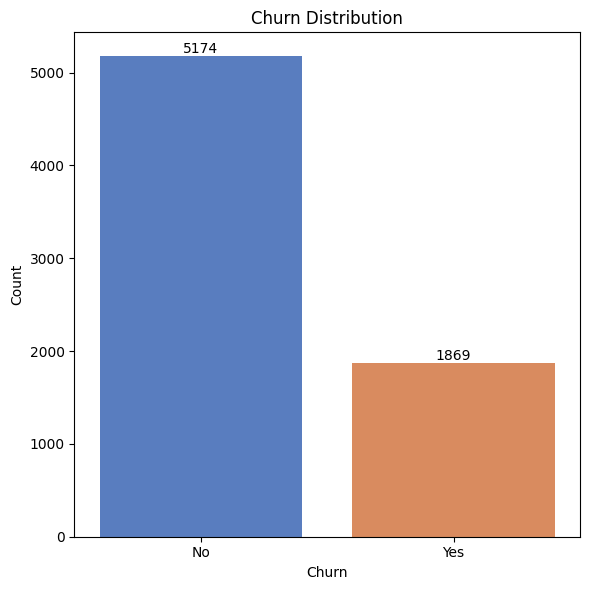

In [10]:
fig,ax = plt.subplots(1, figsize = (6,6))
sns.countplot(data = dataset, x="Churn", ax=ax, palette = 'muted')
ax.set_title("Churn Distribution")
ax.set_xlabel("Churn")
ax.set_ylabel("Count")

for container in ax.containers:
    ax.bar_label(container)
    
fig.tight_layout()
plt.show()

In [11]:
dataset.Churn.value_counts()*100/len(dataset)

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

**Handling Outlier**

There is no outlier present. But this is a code to handle the outlier should you need one. 

In [12]:
Q1 = dataset['tenure'].quantile(0.25)
Q3 = dataset['tenure'].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

#Capping
dataset['tenure'] = np.where(dataset['tenure'] > upper_limit, upper_limit, dataset['tenure'])
dataset['tenure'] = np.where(dataset['tenure'] < lower_limit, lower_limit, dataset['tenure'])

### Bivariate Analysis

**Convert categorical columns to numerical**

In [13]:
dataset['PaperlessBilling'] = dataset['PaperlessBilling'].map({'Yes':1, 'No':0})
dataset['Churn'] = dataset['Churn'].map({'Yes':1, 'No':0})
dataset['Contract'] = dataset['Contract'].map({'Month-to-month':0,"One year":1,"Two year":2})
dataset = pd.get_dummies(dataset, columns = ['InternetService'], drop_first = True)
dataset = dataset.drop("customerID",axis=1)
dataset.head()

,PaperlessBilling,tenure,MonthlyCharges,Contract,Churn,InternetService_Fiber optic,InternetService_No
0,1,1.0,29.85,0,0,False,False
1,0,34.0,56.95,1,0,False,False
2,1,2.0,53.85,0,1,False,False
3,0,45.0,42.30,1,0,False,False
4,1,2.0,70.70,0,1,True,False


**Correlation Plot** <br>
Churn:
- (-0.4) Correlation with contract, meaning lower contract tends to churn higher. 
- (-0.23) Lower tenure tends to churn higher. 

Tenure: 
- (+0.67) Tenure is highly correlated with Contract. Higher tenure means higher contract. 
- Potential Multicolinearity with Contract. Depends on the threshold. 

Monthly Charges:
- (-0.76) Correlated no internet service. Lower charges.
- (+0.79) Correlated with Fiber Optic Internet Service, higher charges. 
- Potential multicolinearity with Contract. Depends on the threshold. 

Paperless Billing:
- (absolute ~0.3) Moderate correlation with Monthly Charges and No Internet Service. 


In [14]:
corr_matrix = dataset.corr()

Text(0.5, 1.0, 'Correlation Plot')

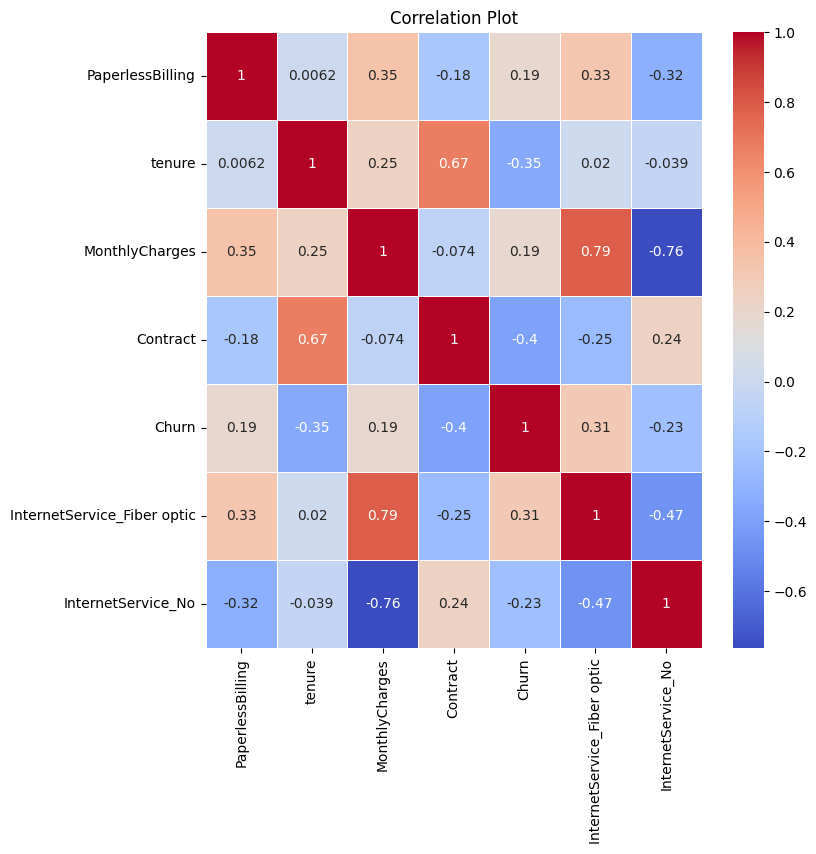

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Plot")

### Assumption
From the analysis, we know that customer that:
- has long tenure and long contract
- has low monthly charges
- No Paperless billing
- The product is not fiber optic

will remain with our product. 

## Modelling

In [16]:
# Pre Modelling Processing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

# Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
import xgboost as xgb

# Evaluation Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

**Split the dataset**

In [17]:
x = dataset.drop("Churn", axis = 1)
y = dataset['Churn']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, stratify=y, random_state = 1)

**Scale X data**

In [18]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

**Train Model**
- The best model is XGBoost with 49.8% average recall.

In [19]:
# Decision tree
dt = DecisionTreeClassifier(random_state = 2)
dt.fit(x_train_scaled, y_train)
dt_cv = cross_val_score(dt, x_train_scaled, y_train, cv= 5, scoring='recall')

print(f"Decision Tree Cross-Validation recall: {dt_cv.mean()}")

# Random Forest
rf = RandomForestClassifier(random_state = 3)
rf.fit(x_train_scaled, y_train)
rf_cv = cross_val_score(rf, x_train_scaled, y_train, cv=5, scoring='recall')

print(f"Random Forest Cross-Validation recall: {rf_cv.mean()}")

# XGBOOST
xgb_model = xgb.XGBClassifier(random_state= 2, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train_scaled, y_train)

xgb_cv = cross_val_score(xgb_model, x_train_scaled, y_train, cv=5, scoring='recall')
print(f"XGBoost Cross-Validation recall: {xgb_cv.mean()}")

Decision Tree Cross-Validation recall: 0.49230769230769234
Random Forest Cross-Validation recall: 0.49632107023411376
XGBoost Cross-Validation recall: 0.4983277591973244


**Evaluation**

In [20]:
def evaluate_model(model, X_test_scaled, y_test, model_name):
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC: {auc:.2f}")

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

Random Forest Evaluation:
Precision: 0.60
Recall: 0.46
F1 Score: 0.52
AUC: 0.81


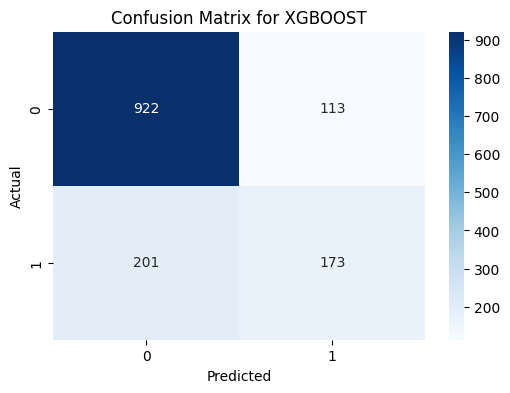

In [21]:
# XGBoost Evaluation
print("Random Forest Evaluation:")
evaluate_model(xgb_model, x_test_scaled, y_test, "XGBOOST")

**Feature Importance**
- The most important feature is Contract, followed by Fiber Optic

In [22]:
def plot_feature_importance(model, feature_names, model_name):
    feature_importances = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x='Importance', y='Feature', data=importance_df, palette='muted')
    plt.title(f'Feature Importance for {model_name}')
    
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

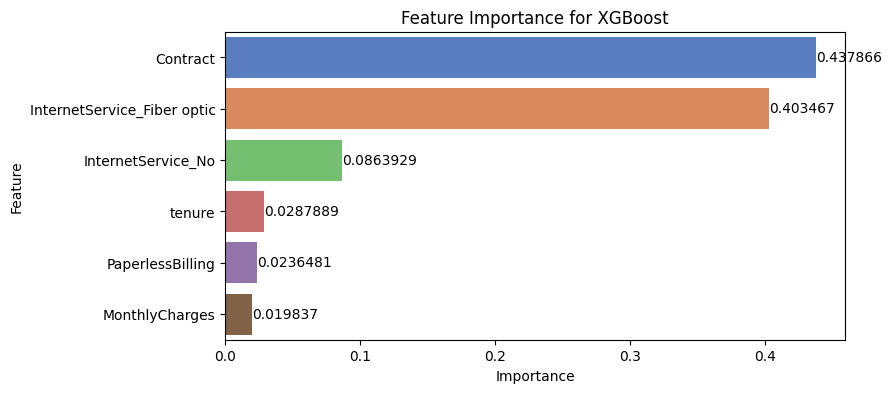

In [23]:
plot_feature_importance(xgb_model, x.columns, "XGBoost")

## Recommendation
- Attempt for long contract